In [1]:
import os
import stella
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NEW_STARS_DIR = '/Users/arcticfox/Documents/flares/chen/' # new stars to find flares with
TRAINING_DIR  = '/Users/arcticfox/Documents/flares/lc' # training set light curve directory
FLARE_CATALOG = '/Users/arcticfox/Documents/flares/catalog_with_simulated.csv' # catalog + path

These are stars that have unidentified flares.

In [3]:
tics, time, flux = [], [], []
for fn in os.listdir(NEW_STARS_DIR)[0:30]:
    tics.append(int(fn.split('_')[0]))
    data = np.load(os.path.join(NEW_STARS_DIR, fn), allow_pickle=True)
    time.append(data[0])
    flux.append(data[1])

This is the command to reorganize the training data before feeding into the neural network. I have a directory of .npy light curve files (fn_dir) that the class takes in.

In [4]:
td = stella.TrainingData(fn_dir=TRAINING_DIR,
                         catalog=FLARE_CATALOG)

  0%|          | 0/941 [00:00<?, ?it/s]//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
//anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 941/941 [00:26<00:00, 35.86it/s]


This creates the CNN model and trains.

In [5]:
cnn = stella.ConvNN(td, epochs=2)

W1115 12:36:36.356389 4641043904 deprecation.py:506] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1115 12:36:36.440407 4641043904 deprecation.py:323] From //anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/2
86256/86256 [==============================] - 15s 172us/sample - loss: 0.0740 - acc: 0.9765
Epoch 2/2
86256/86256 [==============================] - 13s 156us/sample - loss: 0.0358 - acc: 0.9895


This takes a light curve and predicts where the flares are given the trained model.

In [6]:
cnn.predict(time[10:11], flux[10:11])

100%|██████████| 1/1 [00:06<00:00,  6.08s/it]


This finds the flares given some "probability".

In [7]:
char = stella.FlareCharacterization(cnn, prob_accept=0.05)

  0%|          | 0/1 [00:00<?, ?it/s]/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: 

/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly co

/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly co

/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly co

/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly co

/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly conditioned
  poly  = np.polyfit(self.time[i][g], self.flux[i][g], 6)
/Users/arcticfox/Documents/GitHub/stella/stella/characterization.py:100: RankWarning: Polyfit may be poorly co

100%|██████████| 1/1 [00:01<00:00,  1.17s/it]


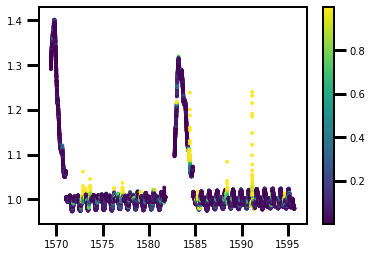

In [8]:
plt.scatter(time[10], flux[10], c=cnn.predictions[0][:,1], s=8)
plt.colorbar()